In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

# Parameters Vector

Load, merge, normalization vector of parameters.

In [4]:
# Loading each csv file
df1 = pd.read_csv('fh.csv')
df2 = pd.read_csv('fp.csv')

Concatenating all four DataFrames into one.

In [13]:
allpatients = pd.concat([df1,df2])
allpatients.head()

Index(['STD', 'MEAN', 'MAX', 'MIN', 'RMS', 'ENERGY', 'Status'], dtype='object')

Features has diffrent rows, so they have to be normalized.

In [18]:
features = ['STD','MEAN','MAX','MIN','RMS','ENERGY']
for i in features:
    allpatients[i] = (allpatients[i] - np.mean(allpatients[i]))/np.std(allpatients[i])
allpatients.head()

,STD,MEAN,MAX,MIN,RMS,ENERGY,Status
0,0.593936,0.160380,-0.061710,-0.235499,0.577321,0.293222,Healthy
1,0.072064,0.199493,-0.670907,0.633390,0.052856,0.336607,Healthy
2,-0.558181,0.179096,-0.171366,1.382476,-0.580551,-0.159774,Pathology
3,-0.941184,0.164111,0.284239,0.124693,-0.965467,-0.719708,Pathology
4,-0.634159,0.166264,-1.197031,0.818712,-0.656909,-1.076720,Pathology


Afterwards data have to be suffled, in order to avoid overfitting

In [35]:
allpatients = allpatients.sample(frac=1).reset_index(drop=True)
allpatients.head()

,STD,MEAN,MAX,MIN,RMS,ENERGY,Pathology
0,-1.712196,0.164241,0.066405,0.053559,-1.740331,-1.060462,1
1,-0.326948,0.175381,-1.029410,0.888441,-0.348163,-0.246419,1
2,0.846392,0.203061,0.580346,-0.708474,0.831053,1.785987,1
3,0.090783,0.165569,0.185660,-0.214751,0.071654,-0.031648,0
4,0.490197,0.165528,-0.029220,-0.526272,0.473063,1.095458,0


Exploratory Data Analysis, quick look at value of each parameters.

/home/barti/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


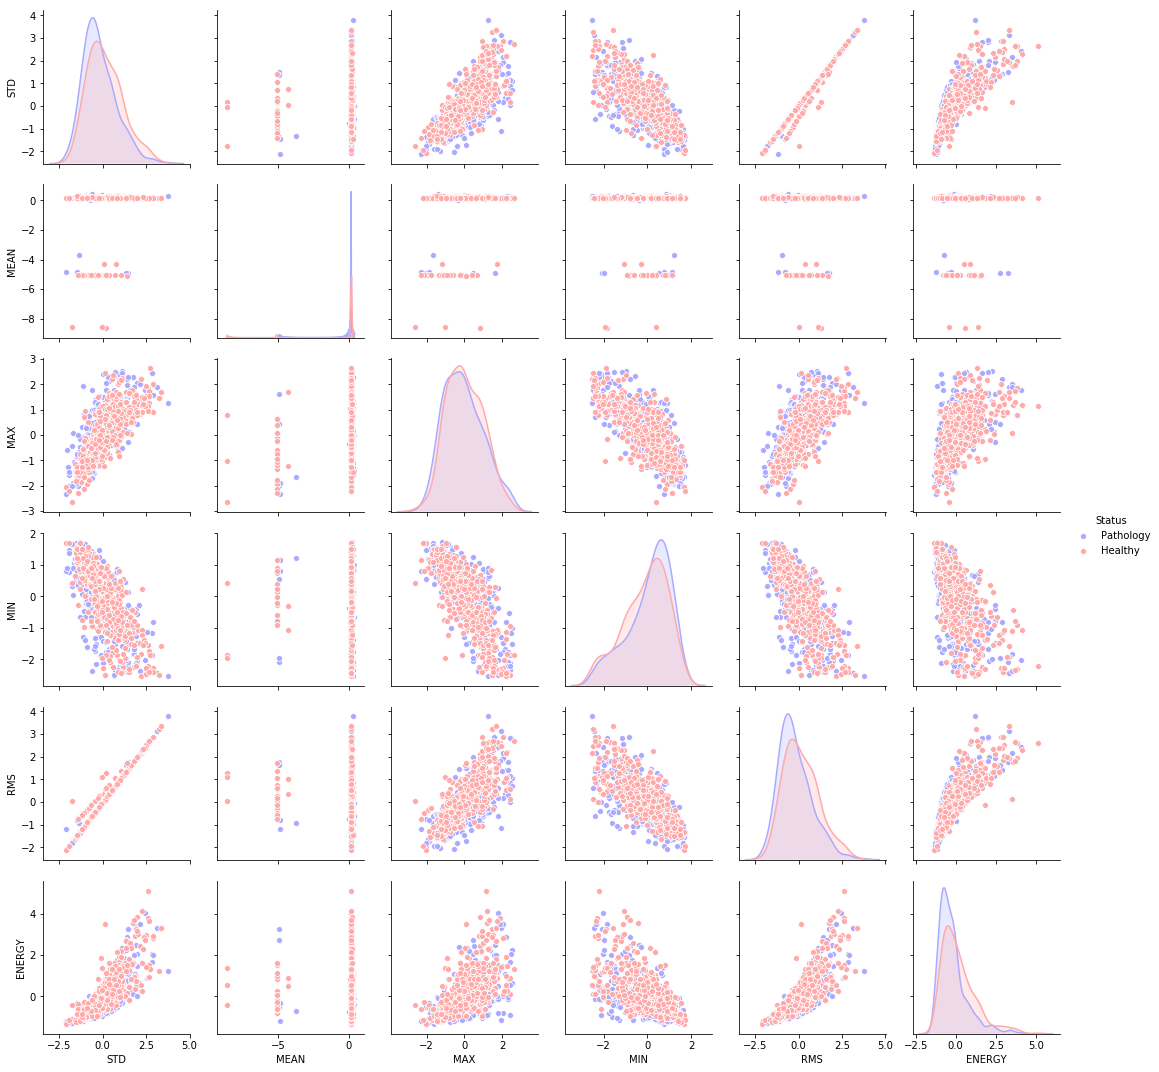

In [20]:
sns.pairplot(allpatients, hue='Status', palette='bwr')

We'll need to convert categorical features (Status) to dummy variables, because our alghoritm can't understant what means 'healthy'.

In [21]:
status = pd.get_dummies(allpatients['Status'],drop_first=True)

In [22]:
allpatients.drop(['Status'],axis=1,inplace=True)

In [23]:
allpatients['Pathology'] = status
allpatients.head()

,STD,MEAN,MAX,MIN,RMS,ENERGY,Pathology
0,-0.870358,0.174885,-1.313702,0.569589,-0.894288,-1.015790,1
1,-0.867341,0.172042,-1.342131,1.291219,-0.891257,-0.919735,1
2,-1.364028,0.182763,-1.215676,1.567641,-1.390420,-1.120679,0
3,0.713919,0.145099,0.193229,0.274915,0.697911,-0.183358,0
4,-0.311004,0.177426,-0.349879,0.216729,-0.332139,-0.143492,0


# Detection alghoritm

Building logistic regression algorithm

# Train test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(allpatients.drop(['Pathology'],axis=1), 
                                                    allpatients['Pathology'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Training and predicting

In [26]:
from sklearn.linear_model import LogisticRegression

In [31]:
logModel = LogisticRegression(max_iter=1000, C = 0.0001)
logModel.fit(X_train, y_train)

/home/barti/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [32]:
prediction = logModel.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.54      0.45      0.49        84
           1       0.55      0.64      0.59        88

   micro avg       0.55      0.55      0.55       172
   macro avg       0.55      0.54      0.54       172
weighted avg       0.55      0.55      0.54       172

